In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [33]:
#How do I #define in python?
DAYS_IN_YEAR = 365
DAYS_MARKET_IS_OPEN = 252

In [30]:
#Loading in data 
df = pd.read_excel("Worst k Removed Correlation.xlsx", header=0)
df_dates = pd.read_excel("Data\\ETF Refined\\Normalized Data.xlsx", header=0)

In [43]:
df_dates.columns[2+DAYS_MARKET_IS_OPEN::100].to_list()

['12/03/2019',
 '04/28/2020',
 '09/18/2020',
 '02/11/2021',
 '07/07/2021',
 '11/26/2021',
 '04/21/2022',
 '09/14/2022',
 '02/07/2023',
 '07/03/2023',
 '11/22/2023']

In [66]:
time_series.__len__()

1007

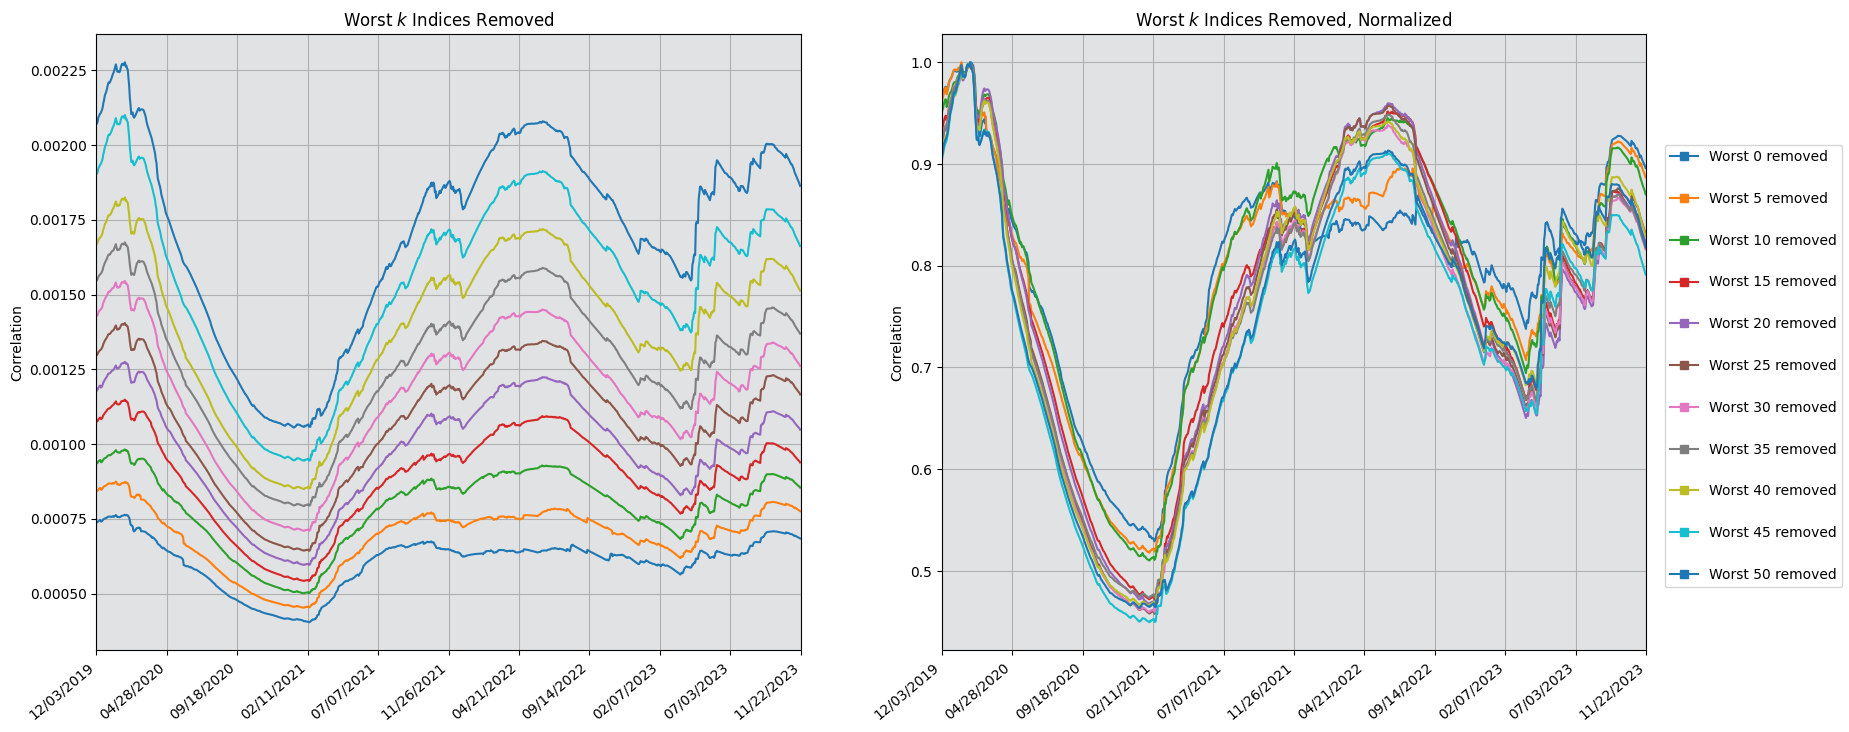

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs = axs.flat
j = 100
# Initialize handles for legend
legend_handles = []

for i, series in enumerate(df.columns):
    time_series = df[f'{series}'].to_numpy()
    time_series = 1/time_series
    axs[0].plot(time_series, label=f'Worst {5*i} removed')
    line, = axs[1].plot(time_series/max(time_series), label=f'Worst {5*i} removed')
    
    # Append a handle with a square marker for the legend
    legend_handles.append(plt.Line2D([0], [0], marker='s', color=line.get_color(), label=f'Worst {5*i} removed'))

fig_titles = [r'Worst $k$ Indices Removed', r'Worst $k$ Indices Removed, Normalized']
dates = df_dates.columns[2+DAYS_MARKET_IS_OPEN:].to_list()
xticks_positions = dates[::j]

for i, ax in enumerate(axs):
    ax.set_facecolor("#e1e2e3")
    ax.grid(True)
    ax.set_title(fig_titles[i])
    ax.set_ylabel("Correlation")
    ax.set_xticks(np.linspace(0, 1007, int(time_series.__len__()/j)+1))
    ax.set_xticklabels(xticks_positions, rotation = 40, ha= 'right')
    ax.set_xlim(0, time_series.__len__())



# Add custom legend with square markers
fig.legend(handles=legend_handles, loc='right', labelspacing=2)

# Show the plot
plt.show()